# Backtests Can Be Misleading
## By: Carter Carlson
### 2020.04.04

Comparing start and end value of a backtested strategy does not necessarily prove the quality of a strategy.  For example, let's pretend we have a baseline strategy that increases 10% in a year.  We have two trading strategies, `A` and `B`, that we want to compare to the baseline to decide which new strategy to use.  Let's start with a portfolio value of $5,000.

In [1]:
import pandas as pd


df = pd.DataFrame(pd.date_range(start='2019-01-01', end='2019-12-31', freq='D'), columns=['date'])

df['Baseline'] = 5000 * (df.index/3640 + 1)
df['Strategy A'] = 5000 * (df.index/2500 + 1)
df['Strategy B'] = 5000 + (660/330**2) * (df.index**2)
df.set_index('date', inplace=True)
df = df.astype(int)

print(df.iloc[[0, -1]])

            Baseline  Strategy A  Strategy B
date                                        
2019-01-01      5000        5000        5000
2019-12-31      5500        5728        5803


Great!  We can see that the `Baseline` strategy increased 10% from 5000 to 5500 dollars, Strategy `A` increased 14.5% to 5728 dollars, and Strategy `B` increased 16% to 5803 dollars.  Does that mean Strategy `B` is best?  Not so fast!  Let's see the total portfolio value over the backtest period.

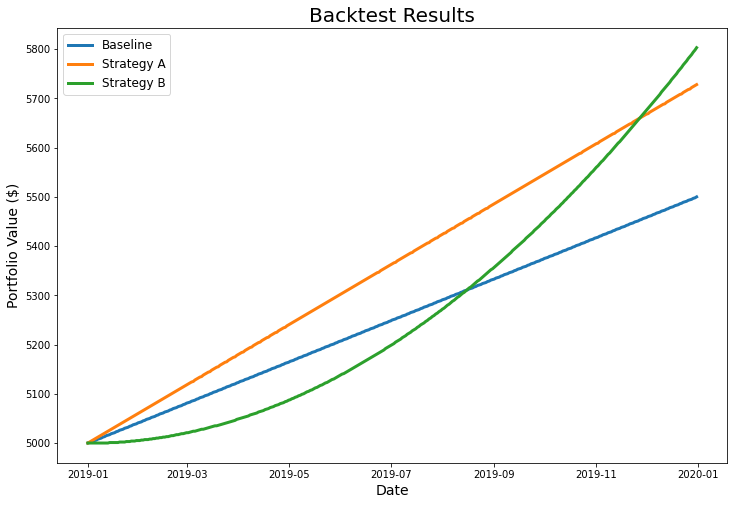

In [2]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df, linewidth=3)

ax.legend(df.columns, loc='upper left', fontsize=12)
ax.set_title('Backtest Results', fontsize=20)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Portfolio Value ($)', fontsize=14)

plt.show()

This chart paints a different picture!  Strategy `B` may have the highest ending value, but it also performs worse than the `Baseline` for the first nine months, and worse than Strategy `A` for eleven of twelve months.

Most traders build their backtests using one start and end date.  When they do this, their goal is to maximize the ending value of the strategy, which usually ends up overfitting their algorithm to the highest ending value.  Would you invest in a strategy that performs worse than the baseline for 75% of the time?

__Do not trust backtests based on one timeframe.__